# **Clustering**

# **Step 1: Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 2: Load and Merge Data**

In [2]:
customers = pd.read_csv('data/Customers.csv')
transactions = pd.read_csv('data/Transactions.csv')

**Aggregate transaction data**

In [3]:
transaction_agg = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'
}).reset_index()

**Merge with customer data**

In [4]:
data = pd.merge(customers, transaction_agg, on='CustomerID', how='left')

**Fill missing values**


In [5]:
data.fillna(0, inplace=True)

# **Step 3: Feature Engineering**

In [6]:
data['AvgTransactionValue'] = data['TotalValue'] / data['TransactionID']
data['AvgTransactionValue'].fillna(0, inplace=True)

C:\Users\darsh\AppData\Local\Temp\ipykernel_14480\1174673596.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AvgTransactionValue'].fillna(0, inplace=True)


**Encode categorical features (Region)**

In [7]:
data = pd.get_dummies(data, columns=['Region'], drop_first=True)

# **Step 4: Normalize Features**

In [8]:
features = ['TotalValue', 'Quantity', 'TransactionID', 'AvgTransactionValue']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# **Step 5: Clustering**

**Dendogram to find Optimal no of clusters**

# **Step 6: Evaluate Clustering**

In [12]:
db_index = davies_bouldin_score(data_scaled, data['Cluster'])
silhouette = silhouette_score(data_scaled, data['Cluster'])

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette}")

Davies-Bouldin Index: 0.9059412873763888
Silhouette Score: 0.32611568463281243


# **Step 7: Visualize Clusters using PCA**

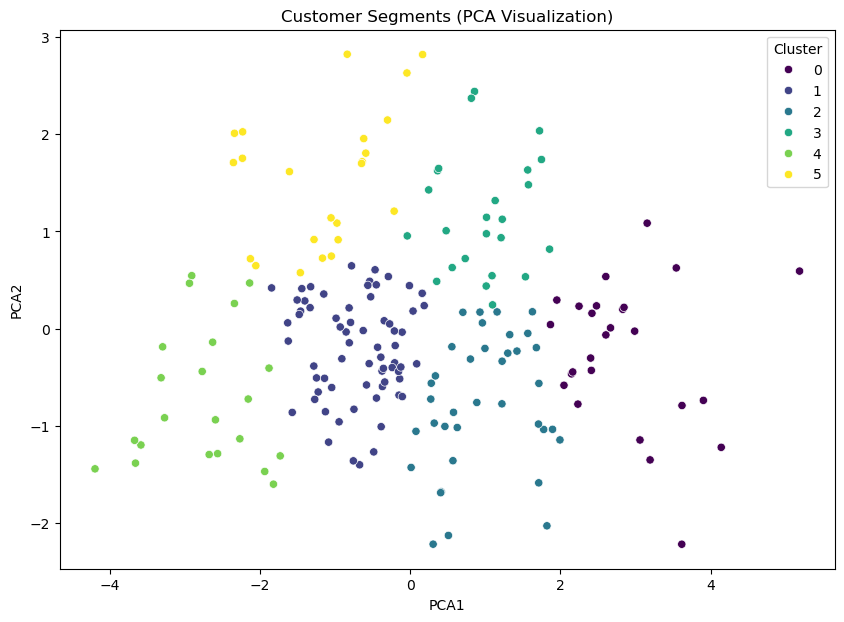

In [13]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments (PCA Visualization)')
plt.show()
